In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data from csv file healthcare_data.csv
df= pd.read_csv("healthcare_data.csv")

#get an overview of the data using info function
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient ID          3000 non-null   object 
 1   Name                3000 non-null   object 
 2   Gender              3000 non-null   object 
 3   Age                 3000 non-null   int64  
 4   Condition           3000 non-null   object 
 5   Admission Date      3000 non-null   object 
 6   Discharge Date      3000 non-null   object 
 7   Admission Days      3000 non-null   int64  
 8   Doctor              3000 non-null   object 
 9   Treatment           3000 non-null   object 
 10  Hospital            3000 non-null   object 
 11  Billing Amount      3000 non-null   float64
 12  Test Result         3000 non-null   object 
 13  Admission Type      3000 non-null   object 
 14  Blood Group         3000 non-null   object 
 15  Medication          3000 non-null   object 
 16  Insura

In [2]:
%pip install seaborn

In [4]:
#getting descriptive data for numerical columns
print(df.describe())

               Age  Admission Days  Billing Amount
count  3000.000000     3000.000000     3000.000000
mean     48.730667        7.452000     7392.425360
std      28.757627        4.042088     4650.583452
min       0.000000        1.000000    -4941.180000
25%      24.000000        4.000000     3638.340000
50%      48.000000        7.000000     7402.455000
75%      74.000000       11.000000    11350.130000
max     100.000000       14.000000    14999.730000


In [5]:
#getting an overview of the dataset
print(df.tail())

     Patient ID           Name  Gender  Age      Condition Admission Date  \
2995      P2996  Laura Johnson  Female   86         Cancer     2023-07-25   
2996      P2997   Jane Johnson  Female   38  Heart Disease     2024-08-07   
2997      P2998   Jane Johnson  Female   18         Asthma     2023-03-29   
2998      P2999  Andrew Taylor    Male   93         Asthma     2023-12-28   
2999      P3000    Chris Clark    Male   73         Stroke     2023-09-10   

     Discharge Date  Admission Days      Doctor     Treatment  \
2995     2023-07-31               6   Dr. Clark  Chemotherapy   
2996     2024-08-08               1  Dr. Miller       Surgery   
2997     2023-04-01               3  Dr. Taylor       Surgery   
2998     2024-01-10              13   Dr. Clark       Surgery   
2999     2023-09-15               5   Dr. Smith    Medication   

                    Hospital  Billing Amount Test Result Admission Type  \
2995     St. Mary's Hospital        10459.67      Normal      Emergency

In [6]:
#checking for missing values or null
print(df.isnull().sum())

Patient ID            0
Name                  0
Gender                0
Age                   0
Condition             0
Admission Date        0
Discharge Date        0
Admission Days        0
Doctor                0
Treatment             0
Hospital              0
Billing Amount        0
Test Result           0
Admission Type        0
Blood Group           0
Medication            0
Insurance Provider    0
dtype: int64


In [7]:
#checking for misspelling or inconsistencies in columns(Medical condition, blood type ,doctors,hospital, insurance provider, admission type, medication)
df["Condition"].value_counts()

Condition
Back Pain        321
Stroke           319
Cancer           308
COVID-19         305
Heart Disease    301
Asthma           301
Pneumonia        299
Migraine         289
Diabetes         281
Flu              276
Name: count, dtype: int64

In [8]:
df["Blood Group"].value_counts()

Blood Group
A-     398
O-     387
AB+    385
O+     381
B+     378
AB-    369
B-     356
A+     346
Name: count, dtype: int64

In [9]:
df["Admission Type"].value_counts()

Admission Type
Urgent       1025
Emergency    1009
Elective      966
Name: count, dtype: int64

In [10]:
df["Medication"].value_counts()

Medication
Pain Relievers     772
Chemotherapy       308
Antibiotics        299
Insulin            281
Oxygen Therapy     167
Blood Thinners     154
Statins            151
Steroids           151
Inhaler            150
Aspirin            150
Antidepressants    140
Cough Syrup        139
Antivirals         138
Name: count, dtype: int64

In [11]:
df["Hospital"].value_counts()

Hospital
Westwood Hospital          455
Eastside Medical Center    444
General Medical Center     437
City Hospital              436
Parkview Medical           424
St. Mary's Hospital        416
HealthCare Clinic          388
Name: count, dtype: int64

In [12]:
df["Insurance Provider"].value_counts()

Insurance Provider
Cigna               522
Anthem              505
UnitedHealthcare    505
Humana              496
Aetna               489
Blue Cross          483
Name: count, dtype: int64

In [13]:
df["Doctor"].value_counts()

Doctor
Dr. Miller     458
Dr. Johnson    445
Dr. Lee        430
Dr. Taylor     428
Dr. Clark      427
Dr. Smith      419
Dr. Brown      393
Name: count, dtype: int64

In [14]:
df["Test Result"].value_counts()

Test Result
Pending     627
Negative    617
Normal      610
Positive    585
Abnormal    561
Name: count, dtype: int64

In [29]:
#datatype conversion to datetime 
df["Admission Date"]=pd.to_datetime(df["Admission Date"], errors='coerce')



In [28]:
df["Discharge Date"]=pd.to_datetime(df["Discharge Date"], errors ="coerce")
print(df["Discharge Date"].dtype)

datetime64[ns]


In [33]:

#calculate number of days admited
df['Days_Admitted'] = (df['Discharge Date'] - df['Admission Date']).dt.days + 1


In [35]:
# find admission year to be used for trend analysis
df["Admission_Year"] = df['Admission Date'].dt.year
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient ID          3000 non-null   object        
 1   Name                3000 non-null   object        
 2   Gender              3000 non-null   object        
 3   Age                 3000 non-null   int64         
 4   Condition           3000 non-null   object        
 5   Admission Date      3000 non-null   datetime64[ns]
 6   Discharge Date      3000 non-null   datetime64[ns]
 7   Admission Days      3000 non-null   int64         
 8   Doctor              3000 non-null   object        
 9   Treatment           3000 non-null   object        
 10  Hospital            3000 non-null   object        
 11  Billing Amount      3000 non-null   float64       
 12  Test Result         3000 non-null   object        
 13  Admission Type      3000 non-null   object      

In [37]:
#Check for duplicates
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [38]:
# Display the duplicate rows if any
if duplicates.sum()>0:
 print(df[duplicates])

In [39]:
# Remove duplicate rows and return datframe
data_cleaned = df.drop_duplicates()

In [90]:
# Convert categorical columns to 'category' data type (e.g., 'Category')
for column in data_cleaned.select_dtypes(include='object').columns:
    print(column)
    if column in ['Gender', 'Blood Group',"Category","Type"]:  # Specify columns if known
        data_cleaned[:,column] = data_cleaned[column].astype('category')
      


Patient ID
Name
Condition
Doctor
Treatment
Hospital
Test Result
Admission Type
Medication
Insurance Provider


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient ID          3000 non-null   object        
 1   Name                3000 non-null   object        
 2   Gender              3000 non-null   object        
 3   Age                 3000 non-null   int64         
 4   Condition           3000 non-null   object        
 5   Admission Date      3000 non-null   datetime64[ns]
 6   Discharge Date      3000 non-null   datetime64[ns]
 7   Admission Days      3000 non-null   int64         
 8   Doctor              3000 non-null   object        
 9   Treatment           3000 non-null   object        
 10  Hospital            3000 non-null   object        
 11  Billing Amount      3000 non-null   float64       
 12  Test Result         3000 non-null   object        
 13  Admission Type      3000 non-null   object      

In [43]:
#check for negative billing in the data.A negative amount means refunds, adjustments, or billing errors
negative_bills = df[df["Billing Amount"] < 0]
negative_bills.shape

(162, 19)

In [45]:
# Group by Hospital Name and calculate the total negative bills per hospital
negative_bills_per_hospital = negative_bills.groupby('Hospital')['Billing Amount'].sum().reset_index()

In [47]:
# Sort by the total negative billing amount
negative_bills_per_hospital = negative_bills_per_hospital.sort_values(by='Billing Amount', ascending=True)

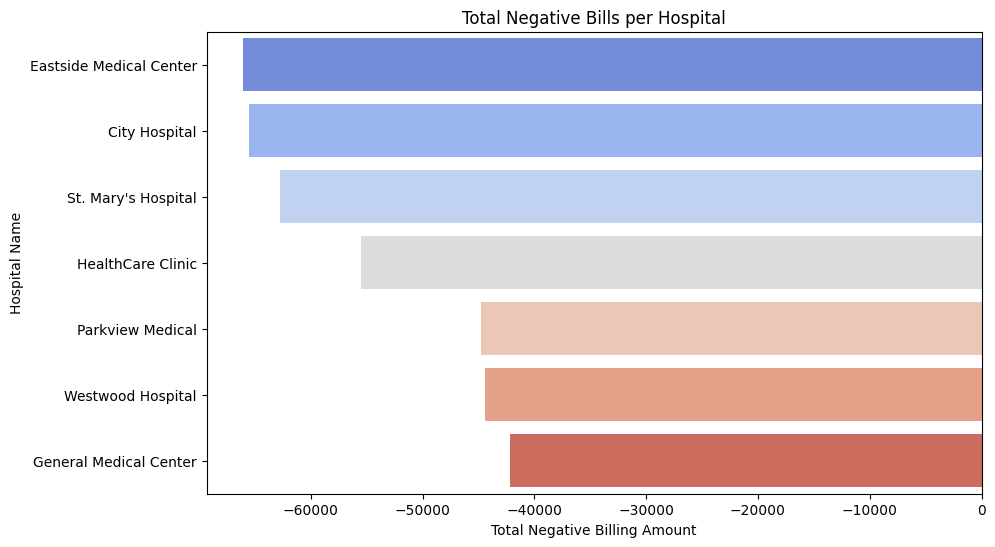

In [124]:
# Plot a bar chart of negative bills per hospital
plt.figure(figsize=(10, 6))
sns.barplot(x='Billing Amount', y='Hospital', data=negative_bills_per_hospital, hue='Hospital', palette='coolwarm')
plt.title('Total Negative Bills per Hospital')
plt.xlabel('Total Negative Billing Amount')
plt.ylabel('Hospital Name')
plt.show()

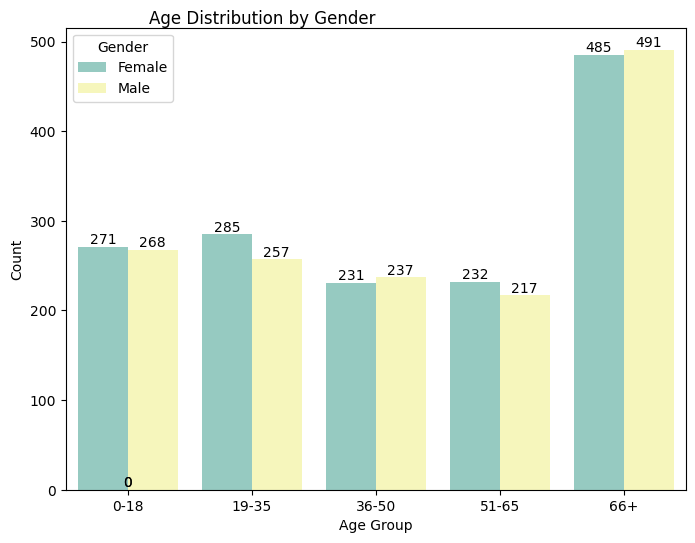

In [125]:
age_bins =[0,18,35,50,65,100]
age_labels = ["0-18","19-35","36-50","51-65","66+"]

plt.figure(figsize=(8,6))
df["Age Group"]=pd.cut(df["Age"],bins=age_bins,labels=age_labels,right=False)
ax = sns.countplot(data=df,x="Age Group",hue="Gender" ,palette='Set3')


for p in ax.patches:
    text=int(p.get_height())
    ax.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")

plt.title("Age Distribution by Gender",ha='right', va='top')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

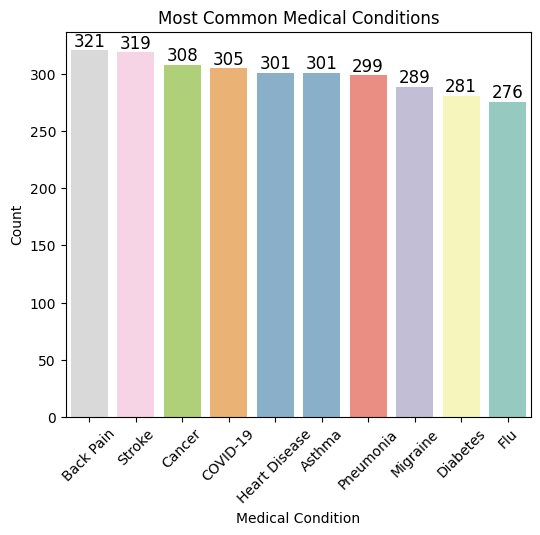

In [123]:
# Count the most common medical conditions
condition_counts = df['Condition'].value_counts()

# Create the bar plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=condition_counts.index, y=condition_counts.values,hue=condition_counts.values, legend=False, palette='Set3')

# Adding labels to each bar
for p in ax.patches:
    # Get the height of each bar (the count)
    height = p.get_height()

    # Add the label (count) above each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,  # y-position (just above the bar)
        int(height),  # Value to display
        ha='center',   # Horizontal alignment
        va='bottom',   # Vertical alignment
        fontsize=12,   # Font size of the label
        color='black'  # Text color
    )

# Adding labels and title
plt.title('Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

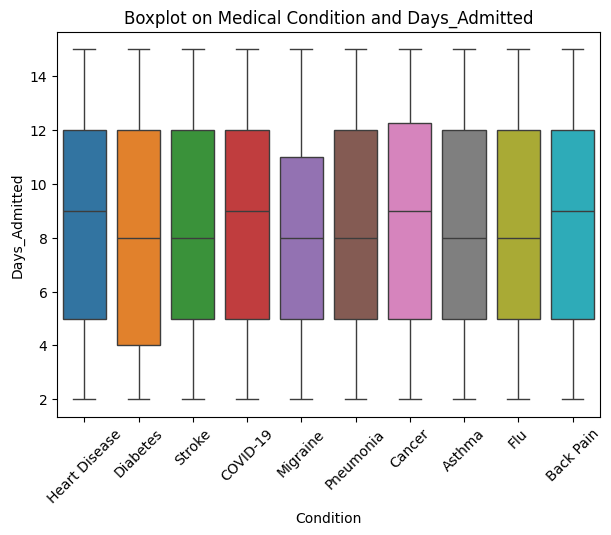

In [112]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, x = 'Condition', y = 'Days_Admitted', hue = 'Condition')
plt.title("Boxplot on Medical Condition and Days_Admitted")
plt.xticks(rotation=45)
plt.show()


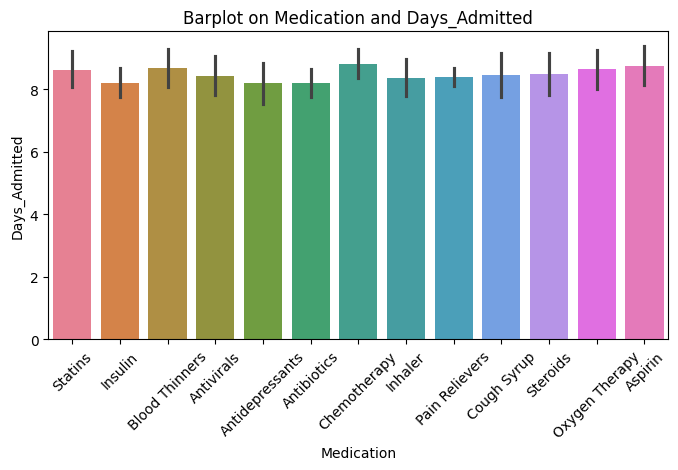

In [108]:
plt.figure(figsize = (8, 4))
sns.barplot(data = df, x = "Medication", y = "Days_Admitted", hue = "Medication")
plt.title("Barplot on Medication and Days_Admitted")
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                     Age  Billing Amount  Days_Admitted
Age             1.000000       -0.001541       0.008061
Billing Amount -0.001541        1.000000      -0.005229
Days_Admitted   0.008061       -0.005229       1.000000


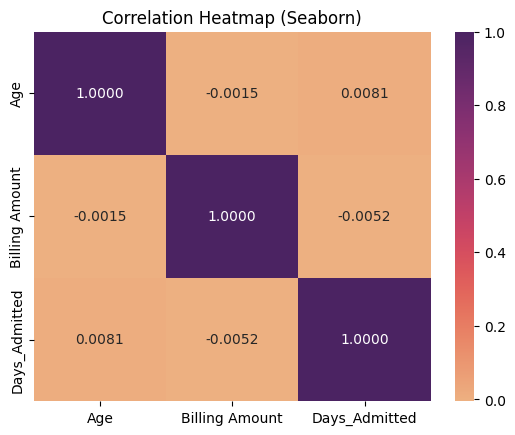

In [83]:
#	Heatmap: Correlation matrix for numeric variables.
#Heatmap shows no significant correlation between numerical variables

correlation_matrix = df[["Age", "Billing Amount", "Days_Admitted"]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="flare", fmt=".4f")
plt.title("Correlation Heatmap (Seaborn)")
plt.show()

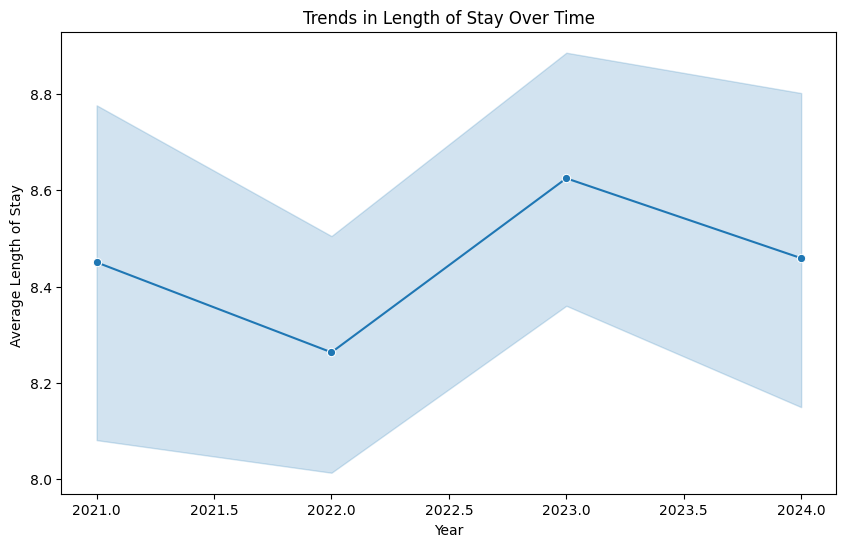

In [86]:
# we can also plot trends over years:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Admission_Year', y='Days_Admitted', data=df, marker='o')
plt.title('Trends in Length of Stay Over Time')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay ')
plt.show()